In [270]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [190]:
data=pd.read_csv('diabetes.csv')
data.head(20)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [183]:
X=data[['Pregnancies','Glucose','BloodPressure','Insulin','BMI', 'Age']]
Y=data['outcome']


In [348]:
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
logr=linear_model.LogisticRegression()
logr.fit(x_train.values,y_train)
o=prediction=logr.predict([[2, 110, 135, 130, 30.5, 38]])


In [349]:
print(o)

[0]


In [205]:
logr=SVC(random_state=0)

In [206]:
logr.fit(x_train, y_train)


SVC(random_state=0)

In [207]:
y_predict=logr.predict(x_test)


In [208]:
cm=confusion_matrix(y_test,y_predict, labels=logr.classes_)

In [209]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logr.classes_)

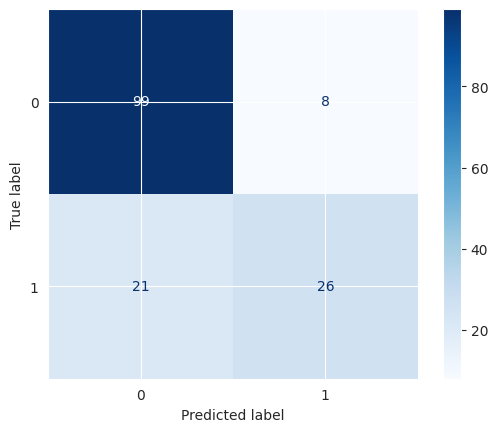

In [210]:
disp.plot(cmap="Blues")
plt.show()

In [211]:
print('El accuracy del modelo de regresion logistica es: ', accuracy_score(y_predict,y_test))

El accuracy del modelo de regresion logistica es:  0.8116883116883117


# Oversampling

In [315]:
ran=RandomOverSampler(sampling_strategy='minority')
x_ran,y_ran=ran.fit_resample(x_train,y_train)

In [316]:
mdbalg=LogisticRegression(max_iter=700)
mdbalg.fit(x_ran,y_ran)

In [317]:
mdbalg_tree=DecisionTreeClassifier(random_state=80)
mdbalg_tree.fit(x_ran,y_ran)

DecisionTreeClassifier(random_state=80)

In [280]:
predbalg_log=mdbalg.predict(x_test)
predbalg_log_predictt=mdbalg.predict_proba(x_test)[:,1]

predbalg_log_tree=mdbalg_tree.predict(x_test)
predbalg_tree_predictt=mdbalg_tree.predict_proba(x_test)[:,1]

In [281]:
print(f"Logistica , {confusion_matrix(y_test,predbalg_log)}")
print(f"Decision, {confusion_matrix(y_test,predbalg_log_tree)}\n")

Logistica , [[81 26]
 [15 32]]
Decision, [[81 26]
 [17 30]]



In [282]:
cm=confusion_matrix(y_test,predbalg_log)

In [283]:
dist=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logr.classes_)

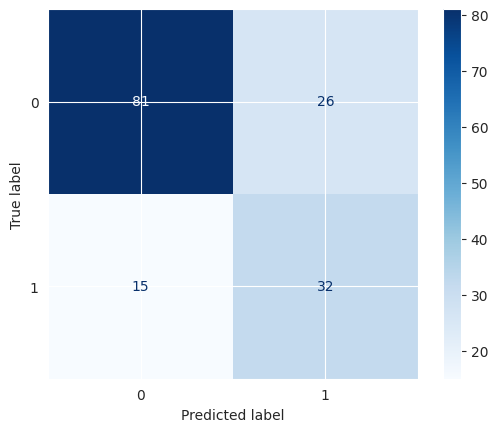

In [284]:
dist.plot(cmap="Blues")
plt.show()

In [286]:
print("auc logistica",roc_auc_score(y_test,predbalg_log_predictt))
print("auc logistica",roc_auc_score(y_test,predbalg_log_tree))

auc logistica 0.8464903559355736
auc logistica 0.697653609067409


In [350]:
predicted=mdbalg.predict([[2, 110, 135, 130, 30.5, 38]])
print(predicted)

[0]


/home/david/miniconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [310]:
ran=RandomUnderSampler()

In [311]:
under=LogisticRegression(max_iter=300)
decision_tree=DecisionTreeClassifier(random_state=80)

In [312]:
under.fit(x_ran,y_ran)
decision_tree.fit(x_ran,y_ran)

DecisionTreeClassifier(random_state=80)

In [304]:
under_log=under.predict(x_test)
under_log_predict=under.predict_proba(x_test)[:,1]

decision_tree_log=decision_tree.predict(x_test)
decision_tree_prob=decision_tree.predict_proba(x_test)[:,1]

In [307]:
print("auc logistica",roc_auc_score(y_test,under_log_predict))
print("auc logistica",roc_auc_score(y_test,decision_tree_prob))

auc logistica 0.8530522966792603
auc logistica 0.7057068999801154


In [364]:
predictionunder=under.predict([[2, 150, 135, 130, 30.5, 38]])
print(predictionunder)
predictionDecision=decision_tree.predict([[2, 200, 135, 130, 30.5, 38]])
print(predictionDecision)

[0]
[1]


/home/david/miniconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/david/miniconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
